# `matplotlib` zorder

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Plot 1: bars with `zorder`

### Data

In [2]:
# mock data
df = pd.DataFrame.from_dict(
    {
        "A": [20, 30],
        "B": [30, 40],
        "C": [10, 20],
        "D": [50, 60],
    },
    orient="index",
    columns=["Green", "Blue"]
)

df

,Green,Blue
A,20,30
B,30,40
C,10,20
D,50,60


### Plot

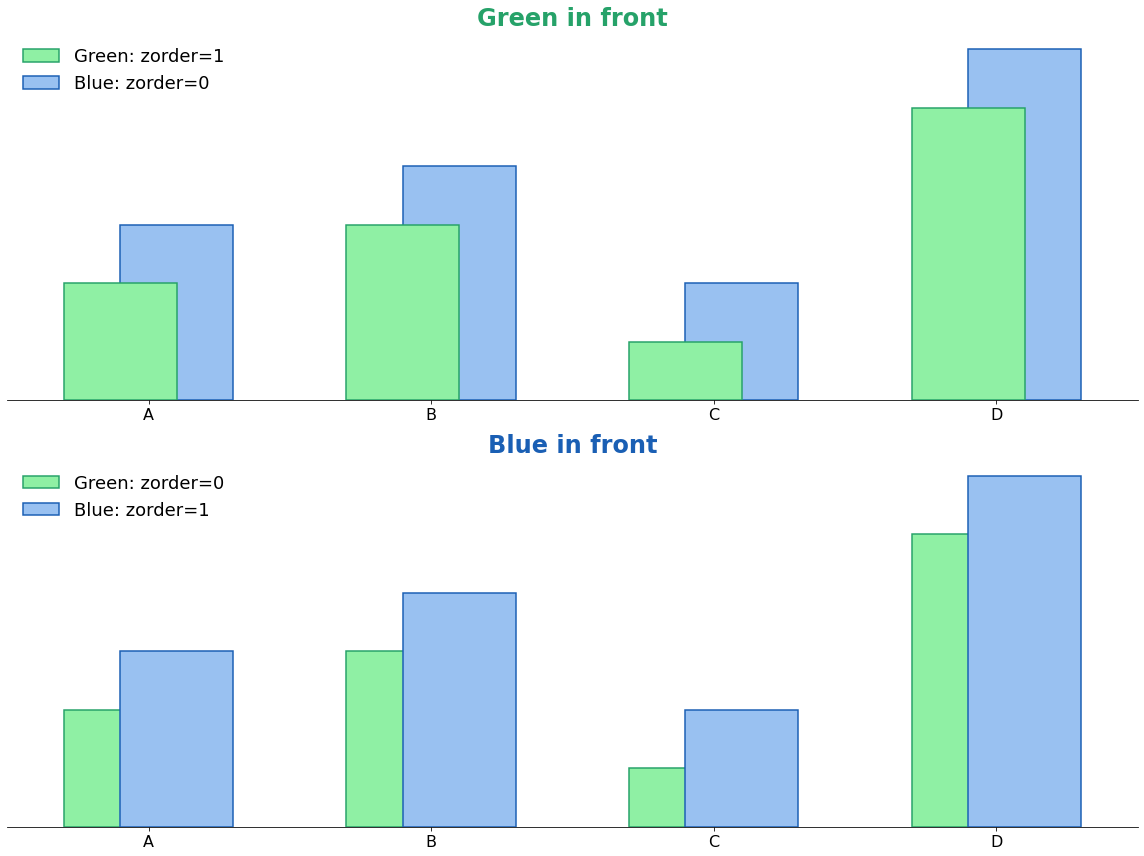

In [3]:
fig, axs = plt.subplots(
    2, 1,
    figsize=(16,12),
    facecolor="white"
)

z_orders = [
    (1, 0),
    (0, 1)
]

titles = [
    "Green in front",
    "Blue in front"
]

colours = [
    "#26a269",  # GNOME green 5
    "#1a5fb4",  # GNOME blue 5
]

for ax, z_vals, title_text, col in zip(axs, z_orders, titles, colours):

    # add title
    ax.set_title(
        title_text,
        color=col,
        fontsize=24,
        fontweight="bold"
    )

    # add bars
    ax.bar(
        x=np.arange(len(df))-0.1,
        height=df["Green"],
        width=0.4,
        facecolor="#8ff0a4",  # GNOME green 1
        edgecolor="#26a269",  # GNOME green 5
        linewidth=1.5,
        label=f"{df.columns[0]}: zorder={z_vals[0]}",
        align="center",
        zorder=z_vals[0]
    )
    ax.bar(
        x=np.arange(len(df))+0.1,
        height=df["Blue"],
        width=0.4,
        facecolor="#99c1f1",  # GNOME blue 1
        edgecolor="#1a5fb4",  # GNOME blue 5
        linewidth=1.5,
        label=f"{df.columns[1]}: zorder={z_vals[1]}",
        align="center",
        zorder=z_vals[1]
    )

    # set axis limits and ticks
    ax.set_xlim(-0.5, 3.5)
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)

    # set legend
    ax.legend(
        loc="upper left",
        fontsize=18,
        frameon=False
    )

    # Hide spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_visible(False)

    # remove ticks and tick labels
    ax.tick_params(
        left=False,
        labelleft=False
    )

    # Update size of the `x` axis tick labels
    ax.tick_params(
        axis="x",
        labelsize=16
    )

plt.tight_layout()

plt.savefig(
    fname="plot1.png",
    format="png",
    dpi=125
);

## Plot 2: lines and markers with `zorder`

### Data

In [4]:
x = [0, 1, 2, 2, 3, 4, 5, 5,  6, 7, 8, 9]
y = [2, 1, 1, 2, 3, 3, 3, 2, 1, 1, 3, 2]

### Plot

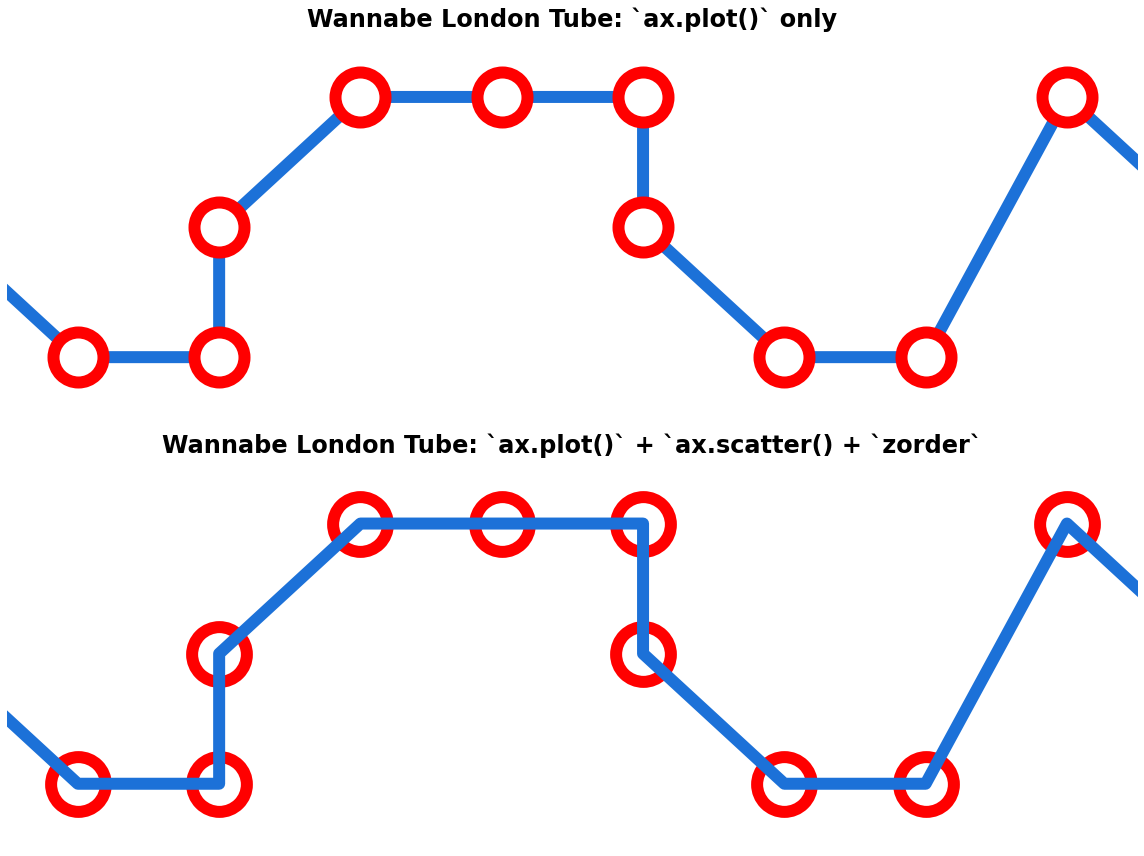

In [5]:
fig, axs = plt.subplots(
    2, 1,
    figsize=(16,12),
    facecolor="white"
)

# add titles
axs[0].set_title(
   "Wannabe London Tube: `ax.plot()` only",
    fontsize=24,
    fontweight="bold"
)
axs[1].set_title(
   "Wannabe London Tube: `ax.plot()` + `ax.scatter() + `zorder`",
    fontsize=24,
    fontweight="bold"
)

# top plot
axs[0].plot(
    x, y,
    color="#1c71d8",  # GNOME blue 4
    linewidth=12,
    marker="o",
    markersize=50,
    markeredgecolor="red",
    markerfacecolor="white",
    markeredgewidth=12
)

# bottom plot
axs[1].plot(
    x, y,
    color="#1c71d8",  # GNOME blue 4
    linewidth=12,
    zorder=1
)
axs[1].scatter(
    x=x,
    y=y,
    s=3000,
    color="white",
    edgecolor="red",
    linewidths=12,
    zorder=0
)

for ax in axs:
    # set axis limits
    ax.set_xlim(0.5, 8.5)
    ax.set_ylim(0.5, 3.5)

    # Hide spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.bottom.set_visible(False)

    # remove ticks and tick labels
    ax.tick_params(
        left=False,
        labelleft=False,
        bottom=False,
        labelbottom=False
    )



plt.tight_layout()

plt.savefig(
    fname="plot2.png",
    format="png",
    dpi=125
);

## Plot 3: axes order

### Axes plotted in order of creating

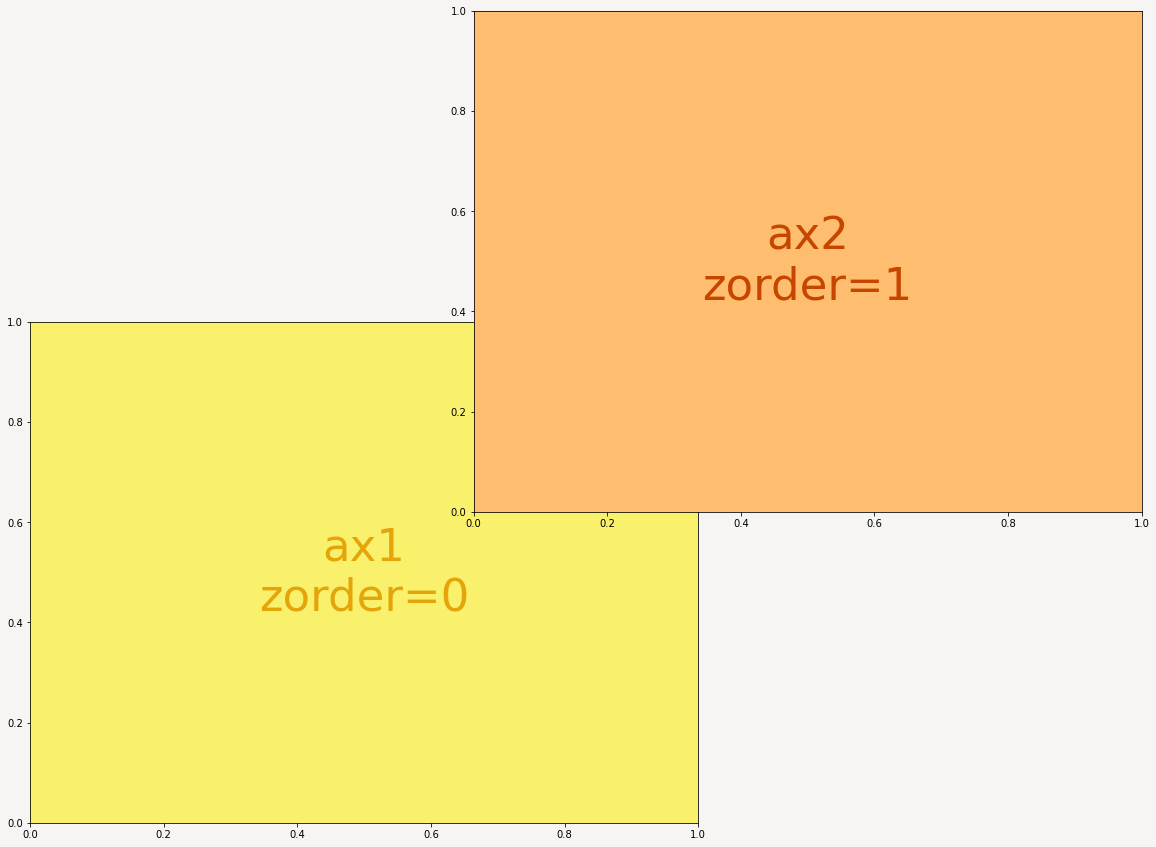

In [6]:
fig = plt.figure(
    figsize=(16, 12),
    facecolor="#f6f5f4"

)

rect1 = 0.025, 0.04, 0.58, 0.58 #  x, y, width, heigh
ax1 = fig.add_axes(
    rect1,
    facecolor="#f9f06b",  # GNOME yellow 1
    zorder=0
)
ax1.text(
    0.5, 0.5,
    "ax1\nzorder=0",
    fontsize=45,
    color="#e5a50a",  #GNOME yellow 5,
    ha="center",
    va="center"
)

rect2 = 0.41, 0.4, 0.58, 0.58
ax2 = fig.add_axes(
    rect2,
    facecolor="#ffbe6f",  # GNOME orange 1
    zorder=1
)
ax2.text(
    0.5, 0.5,
    "ax2\nzorder=1",
    fontsize=45,
    color="#c64600",  #GNOME orange 5
    ha="center",
    va="center"
)

plt.savefig(
    fname="plot3.1.png",
    format="png",
    dpi=125
);

### Axes order set by `zorder`

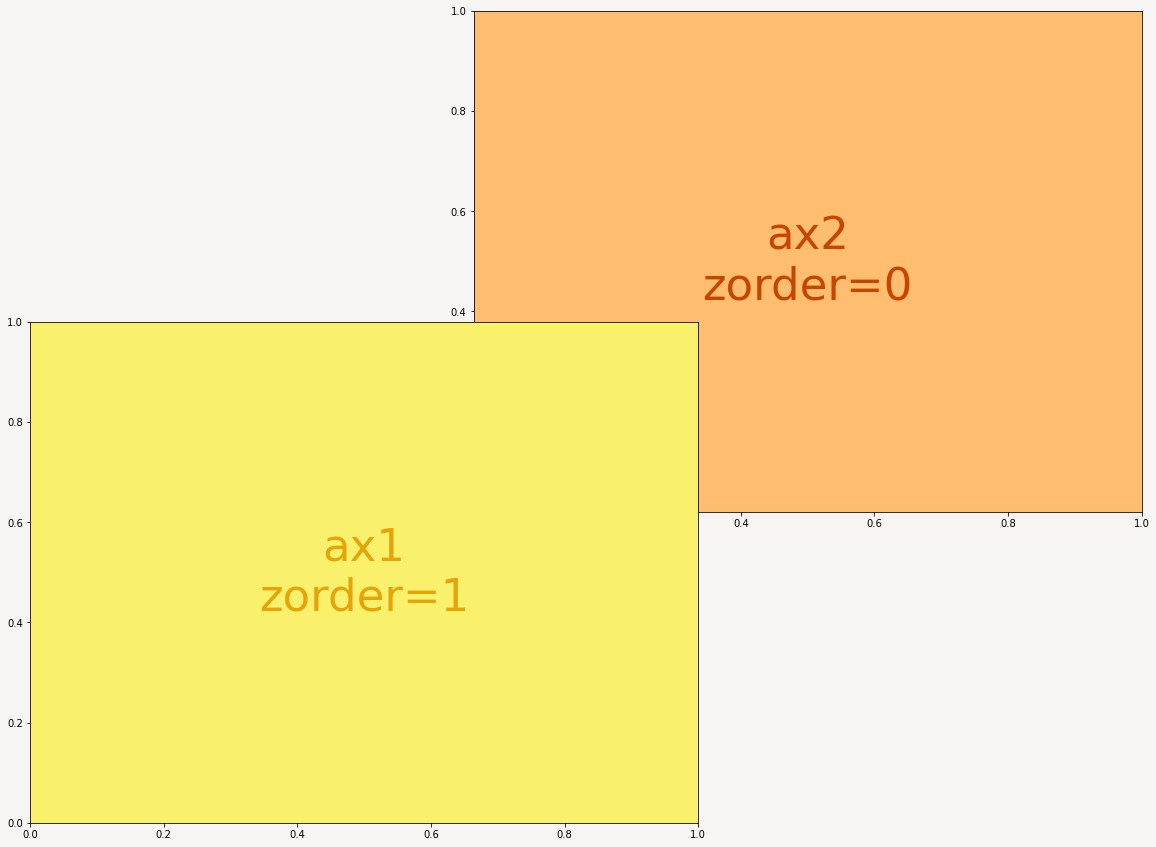

In [7]:
fig = plt.figure(
    figsize=(16, 12),
    facecolor="#f6f5f4"

)

rect1 = 0.025, 0.04, 0.58, 0.58 #  x, y, width, heigh
ax1 = fig.add_axes(
    rect1,
    facecolor="#f9f06b",  # GNOME yellow 1
    zorder=1
)
ax1.text(
    0.5, 0.5,
    "ax1\nzorder=1",
    fontsize=45,
    color="#e5a50a",  #GNOME yellow 5,
    ha="center",
    va="center"
)

rect2 = 0.41, 0.4, 0.58, 0.58
ax2 = fig.add_axes(
    rect2,
    facecolor="#ffbe6f",  # GNOME orange 1
    zorder=0
)
ax2.text(
    0.5, 0.5,
    "ax2\nzorder=0",
    fontsize=45,
    color="#c64600",  #GNOME orange 5
    ha="center",
    va="center"
);

plt.savefig(
    fname="plot3.2.png",
    format="png",
    dpi=125
);

## Plot 4: gridlines order

Use [ax.set_axisbelow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_axisbelow.html#matplotlib.axes.Axes.set_axisbelow) to move the grid lines behind the other artists.

### Data

In [8]:
step = 0.1
x = np.arange(-10, 10, step)
y = np.sin(x)

### Plot

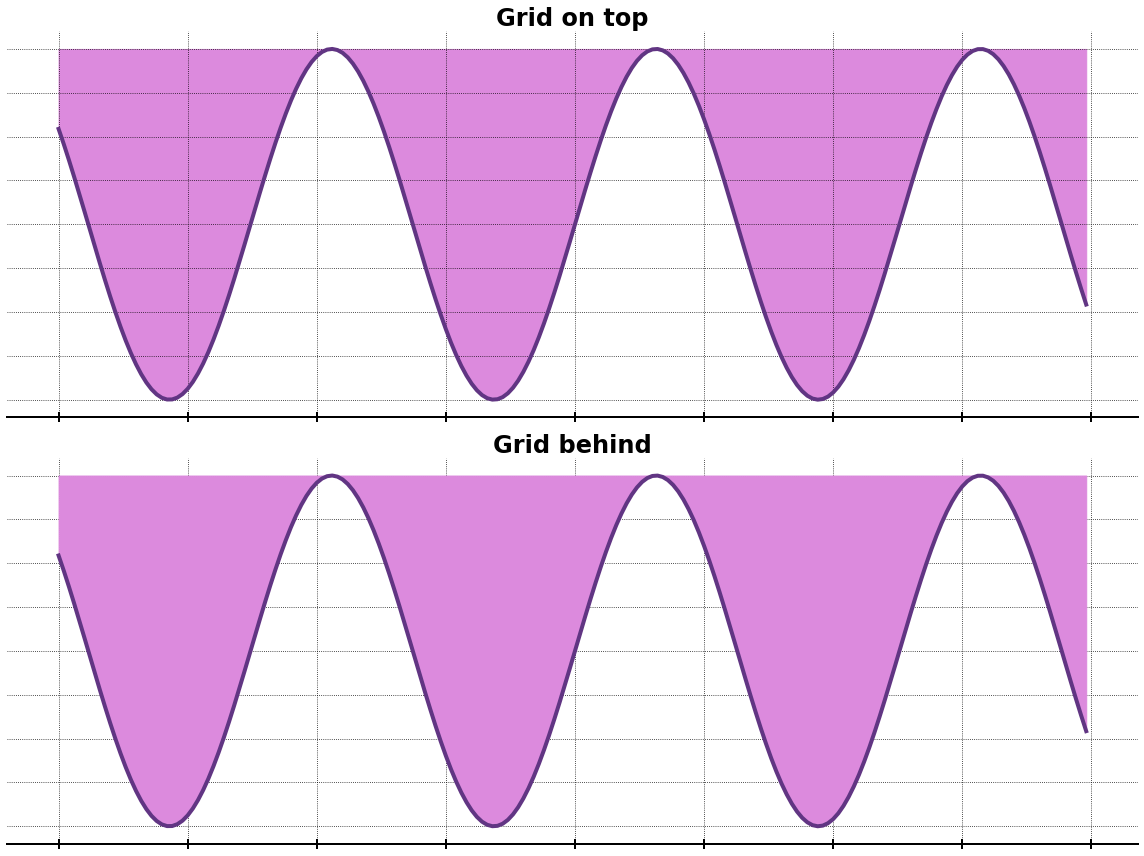

In [9]:
fig, axs = plt.subplots(
    2, 1,
    figsize=(16,12),
    facecolor="white"
)

# add titles
axs[0].set_title(
   "Grid on top",
    fontsize=24,
    fontweight="bold"
)
axs[1].set_title(
   "Grid behind",
    fontsize=24,
    fontweight="bold"
)

# top plot
axs[0].plot(
    x, y,
    color="#613583",  # GNOME purple 5
    linewidth=4
)
axs[0].fill_between(
    x, y, max(y),
    color="#dc8add"  # GNOME purple 1
)
axs[0].grid(
    color="black",
    linestyle=":"
)


# bottom plot
axs[1].plot(
    x, y,
    color="#613583",  # GNOME purple 5
    linewidth=4
)
axs[1].fill_between(
    x, y, max(y),
    color="#dc8add"  # GNOME purple 1
)
axs[1].grid(
    color="black",
    linestyle=":"
)
axs[1].set_axisbelow(True)

for ax in axs:
    # set axis limits
    # ax.set_xlim(0.5, 8.5)
    # ax.set_ylim(0.5, 3.5)

    # Hide spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_visible(False)

    # remove ticks and tick labels
    ax.tick_params(
        left=False,
        labelleft=False,
        labelbottom=False,
        direction="inout",
        width=2,
        length=10
    )

    # Update thickness of the bottom spine
    ax.spines["bottom"].set_linewidth(2)



plt.tight_layout()

plt.savefig(
    fname="plot4.png",
    format="png",
    dpi=125
);